<a href="https://colab.research.google.com/github/liz-robson/data-analysis-with-python/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 1 Read csv file
df = pd.read_csv('medical_examination.csv')
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
# 2 Create new column to work out BMI

# Calculate BMI
bmi_data = df['weight'] / (df['height'] / 100) ** 2

# Set each entry to True in condition below met, else set to false
df['overweight'] = bmi_data > 25

# Convert boolean to integer
df['overweight'] = df['overweight'].astype(int)

print(df['overweight'])

In [16]:
# 3 Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

# Normalise cholesterol
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)

# Normalise glucose
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)



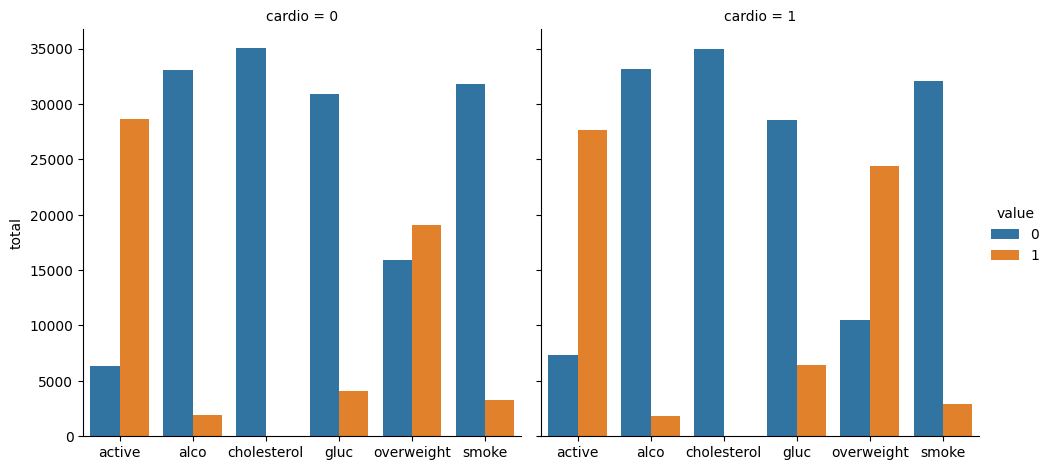

In [34]:
# 4 Draw the Categorical Plot in the draw_cat_plot function

# 5 Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

# 6 Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

# 7 Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()

# 8 Get the figure for the output and store it in the fig variable

df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars ="cardio")
df_cat.rename(columns={'variable': 'feature'}, inplace=True)
plot = sns.catplot(data=df_cat, kind="count", x="feature", hue="value", col="cardio")
plot.set_axis_labels("", "total")
fig = plot.fig


In [54]:
# 10 Draw the Heat Map in the draw_heat_map function

def draw_heat_map():
  df_heat = df[
      (df["height"] >= (df["height"].quantile(0.025))) &
       (df["height"] <= (df["height"].quantile(0.975))) &
        (df["weight"] >= (df["weight"].quantile(0.025))) &
         (df["weight"] <= (df["weight"].quantile(0.975)))
]

# Calculate the correlation matrix
  corr = df_heat.corr()


# Generate a mask for the upper triangle
  mask = np.triu(corr)


# Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(12,10))

  sns.heatmap(corr,annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5, mask=mask, vmax=.8, center=0.09,square=True, cbar_kws = {'shrink':0.5})

  plt.title('Heatmap')

  plt.show()

  draw_heat_map()